<a href="https://colab.research.google.com/github/2yeonsong/MachineLearning/blob/main/3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 준비

In [55]:
import pandas as pd

# 타겟 데이터
df = pd.read_csv('https://bit.ly/perch_csv_data')

# 넘파이 배열
perch_full = df.to_numpy()

# 길이 높이 두께
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [4]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [8]:
# 새로운 특성 추가(사이킷런의 변환기)
from sklearn.preprocessing import PolynomialFeatures

In [11]:
# 2개의 특성 2와 3으로 이루어진 샘플에 대한 새로운 특성 조합을 생성
poly = PolynomialFeatures()

# 훈련을 하여 새롭게 만들 특성 조합을 찾음(fit)
poly.fit([[2, 3]])

# 실제 데이터로 변환(transform)
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [12]:
# 특성에서 절편 제거
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [14]:
# 훈련 세트 변환
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

# fit이랑 transform 한번에 하는거
# train_poly = poly.fit_transform(train_input)

In [15]:
print(train_poly.shape)

(42, 9)


In [16]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [18]:
test_poly = poly.transform(test_input)
# 딱히 훈련 할 필요 없다??? 뭘까..
# test_poly = poly.fit_transform(test_input)

In [21]:
# 더 많은 특성 추가하기
# degree 차원!!! 5제곱 하겠대~~
# 이게 맞나?!?!?
# poly = PolynomialFeatures(degree=5, include_bias=False)

In [54]:
# 경사 하강법...
# 함수의 기울기(경사)를 구하고 경사가 가장 낮은 방향으로 계속 이동시켜 극값에 이를 때까지 반복
# 최하값을 찾는.. 조금조금씩 이동~~~


↓기울기와 절편은 어떻게 찾는지 ~~

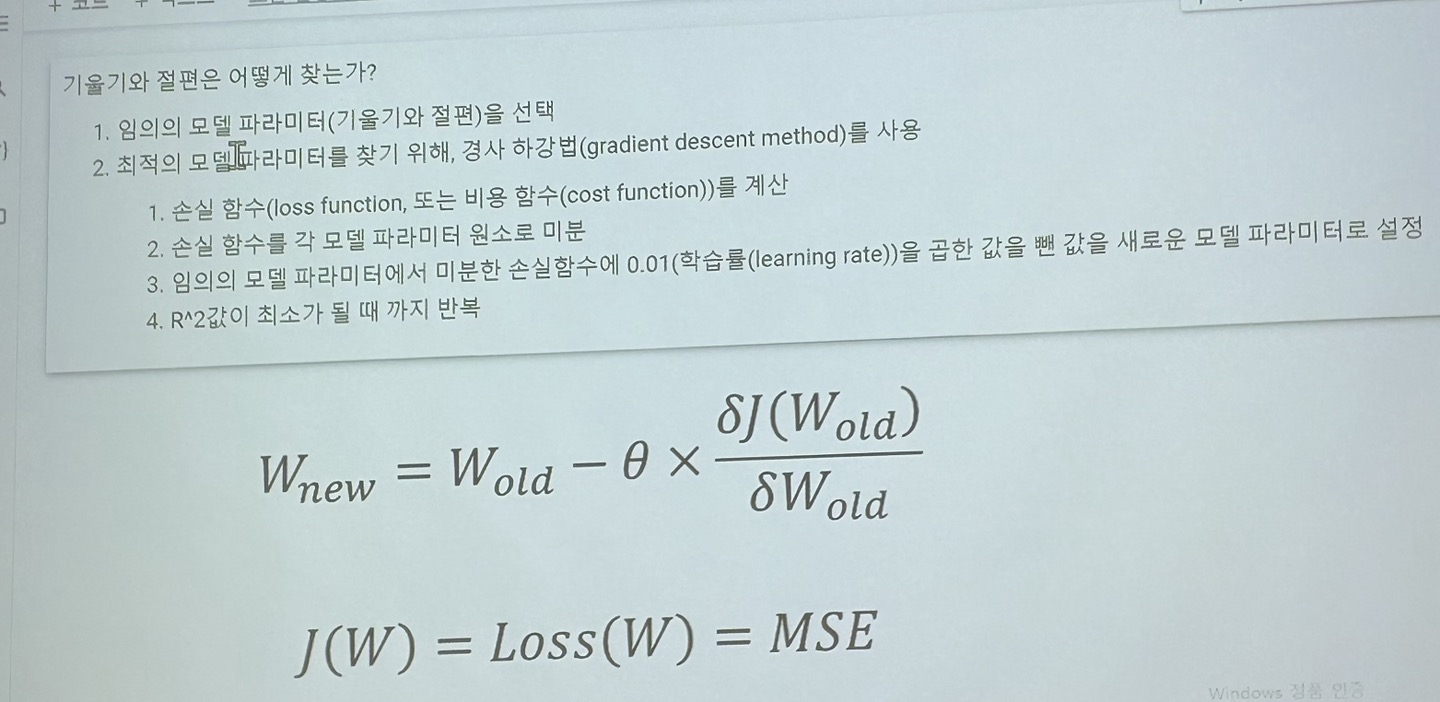

In [25]:
# 과대적합 해결!! -> 규제
# 계수를 규제하여 훈련 세트의 점수를 낮추고...

# 사이킥런의 변환기 중 하나인 StandardScaler 클래스 사용
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [26]:
# ※주의!! 훈련세트로 학습한 변환기를 사용하여 테스트 세트를 변환해야함 ※

In [ ]:
# 1. 데이터 정규화
# 2. 특성 확장
# 3. 문제 해결(규제)

In [28]:
# 계수의 크기를 줄이는거!! <- 선형 회귀 모델에서 사용하는 규제!!! (릿지, 라쏘)

릿지(계수를 제곱한 값을 기준으로, 확률적 평균 경사 하강법 사용)

In [31]:
# 배치 : 모든 데이터를 의미
# 미니배치 : 전체 훈련 데이터 중 일정 크기로 분할된 데이터들을 의미

In [33]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


In [39]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [40]:
# 규제 양 조절(alpha)
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만들기
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

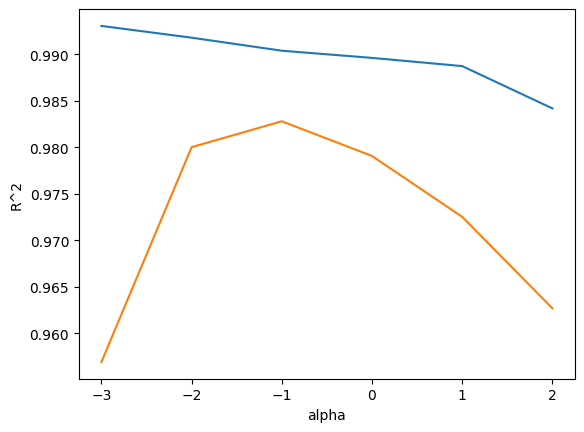

In [42]:
# 로그 스케일로 변경
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [49]:
# print(lr.coef_, lr.intercept_)
# print(ridge.coef_, reidge.intercept_)

라쏘(계수의 절대값을 기준으로 규제를 적용, 좌표 하강법 사용)

In [32]:
# 라쏘의 특징 : 계수의 크기를 0으로 만들 수 있다. (릿지는 줄이기만 하지 0으로 만들지는 않는다.)

In [43]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [44]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만들기
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


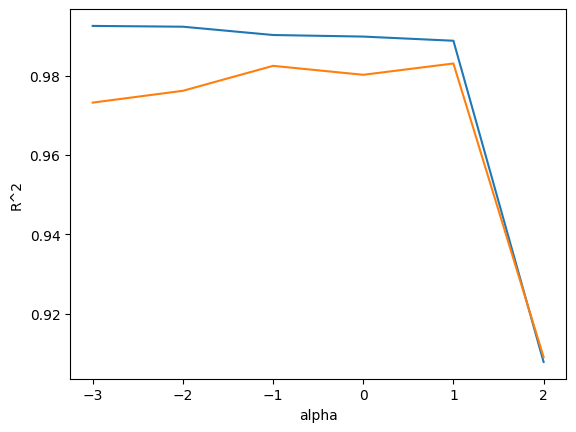

In [45]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [50]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [51]:
print(np.sum(lasso.coef_ == 0))

40


In [53]:
# 릿지와 라쏘를 비교하면 릿지가 조금 더 높은 결정계수를 얻음